In [1]:
# Let's import necessary libraries

#Standard library for data analysis:
import pandas as pd

#Standard library for data visualization:
import matplotlib.pyplot as plt

In [2]:
# Let's load transactions data
transactions = pd.read_excel("Data.xlsx", sheet_name="Transactions")

In [3]:
# Let's have a look at the transaction data
transactions.head(10)

,Transaction ID,Date,Product name,Quantity
0,1,2022-02-01,Samsung QN55Q80T,1
1,1,2022-02-01,Apple iPhone 12 Pro,1
2,2,2022-02-02,Lenovo Tab P11 Pro,2
3,2,2022-02-02,Xiaomi Poco X3 Pro,1
4,3,2022-02-03,Bose QuietComfort Earbuds,2
5,4,2022-02-04,Samsung Galaxy S21 Ultra,1
6,5,2022-02-05,LG OLED55CX,1
7,5,2022-02-05,Bose QuietComfort Earbuds,1
8,6,2022-02-06,JBL Charge 4,2
9,7,2022-02-07,Apple iPad Air,1


In [4]:
# number of rows in the transaction table
transactions.shape[0]

141

In [5]:
# Let's load products data
products = pd.read_excel("Data.xlsx", sheet_name="Products")

In [6]:
# Let's have a look at the products data
products

,Product name,Category,Price
0,JBL Charge 4,Audio,2990
1,Bose QuietComfort Earbuds,Audio,7490
2,Sony WH-1000XM4,Audio,10490
3,LG OLED55CX,Televize,38990
4,Samsung QN55Q80T,Televize,29990
5,LG 75NANO81,Televize,44990
6,Apple iPhone 12 Pro,Mobilní telefony,27990
7,Samsung Galaxy S21 Ultra,Mobilní telefony,25490
8,Xiaomi Poco X3 Pro,Mobilní telefony,5690
9,Apple iPad Air,Tablety,17990


## 1. Na jaké kategorii produktů máme největší obrat? A zajímalo by mě i jestli se to v jednotlivých měsících mění.

### 1.1 Na jaké kategorii produktů máme největší obrat?

In [7]:
# Let's extend transaction data with 'Category' and 'Price' from products table
# by merging them with products data
extended_data = transactions.merge(
    products, on="Product name"
).sort_values(by="Transaction ID").reset_index(drop=True)

In [8]:
# Let's have a look at the extended transaction data
extended_data.head(10)

,Transaction ID,Date,Product name,Quantity,Category,Price
0,1,2022-02-01,Samsung QN55Q80T,1,Televize,29990
1,1,2022-02-01,Apple iPhone 12 Pro,1,Mobilní telefony,27990
2,2,2022-02-02,Xiaomi Poco X3 Pro,1,Mobilní telefony,5690
3,2,2022-02-02,Lenovo Tab P11 Pro,2,Tablety,11990
4,3,2022-02-03,Bose QuietComfort Earbuds,2,Audio,7490
5,4,2022-02-04,Samsung Galaxy S21 Ultra,1,Mobilní telefony,25490
6,5,2022-02-05,Bose QuietComfort Earbuds,1,Audio,7490
7,5,2022-02-05,LG OLED55CX,1,Televize,38990
8,6,2022-02-06,JBL Charge 4,2,Audio,2990
9,7,2022-02-07,Apple iPad Air,1,Tablety,17990


In [9]:
# Let's add a new column 'Value' by multiplying 
# 'Quantity' and corresponding 'Price' columns
extended_data["Value"] = extended_data.apply(
    lambda row: row["Quantity"] * row["Price"],
    axis=1
)

In [10]:
# Let's have a look at the extended transaction data
extended_data.head()

,Transaction ID,Date,Product name,Quantity,Category,Price,Value
0,1,2022-02-01,Samsung QN55Q80T,1,Televize,29990,29990
1,1,2022-02-01,Apple iPhone 12 Pro,1,Mobilní telefony,27990,27990
2,2,2022-02-02,Xiaomi Poco X3 Pro,1,Mobilní telefony,5690,5690
3,2,2022-02-02,Lenovo Tab P11 Pro,2,Tablety,11990,23980
4,3,2022-02-03,Bose QuietComfort Earbuds,2,Audio,7490,14980


In [11]:
# Let's calculate turnover by each category
turnover_by_category = extended_data.groupby("Category").agg({
    "Quantity": "sum",
    "Value": "sum"
}).sort_values(by="Value", ascending=False).rename(columns={
    "Value":"Turnonver"
})

In [12]:
# Let's display the result
turnover_by_category

,Quantity,Turnonver
Category,,
Televize,32,1205680
Tablety,34,623660
Mobilní telefony,34,614460
Audio,63,416370


### 1.2 A zajímalo by mě i jestli se to v jednotlivých měsících mění.

In [13]:
# Let's check data types per each column
extended_data.dtypes

Transaction ID             int64
Date              datetime64[ns]
Product name              object
Quantity                   int64
Category                  object
Price                      int64
Value                      int64
dtype: object

In [14]:
# Let's add a new column 'Month' by applying lambda 
# function that calculates month from date
extended_data["Month"] = extended_data.apply(
    lambda row: row["Date"].month,
    axis=1
)

In [15]:
# Let's have a look at the extended transaction data
extended_data.head()

,Transaction ID,Date,Product name,Quantity,Category,Price,Value,Month
0,1,2022-02-01,Samsung QN55Q80T,1,Televize,29990,29990,2
1,1,2022-02-01,Apple iPhone 12 Pro,1,Mobilní telefony,27990,27990,2
2,2,2022-02-02,Xiaomi Poco X3 Pro,1,Mobilní telefony,5690,5690,2
3,2,2022-02-02,Lenovo Tab P11 Pro,2,Tablety,11990,23980,2
4,3,2022-02-03,Bose QuietComfort Earbuds,2,Audio,7490,14980,2


In [16]:
# Let's calculate turnover by month in each category
turnover_by_month_and_cat = extended_data[
    ["Month", "Category", "Value"]
].groupby(["Month", "Category"]).agg({
    "Value": "sum"
}).sort_values(by=["Month", "Value"], ascending=[True, False]).rename(columns={
    "Value":"Turnonver"
})

In [17]:
# Let's display the result
turnover_by_month_and_cat

Turnonver
Month Category                   
2     Televize             290920
      Mobilní telefony     208690
      Tablety              188890
      Audio                130310
3     Televize             380900
      Tablety              164910
      Mobilní telefony     157710
      Audio                107820
4     Televize             266930
      Mobilní telefony     177510
      Tablety              171910
      Audio                107840
5     Televize             266930
      Tablety               97950
      Mobilní telefony      70550
      Audio                 70400

## 2. Který den v týdnu je nejsilnější na počet objednávek?

In [18]:
# Let's define mapping for weekdays
WEEKDAYS = {
    0: "Monday",
    1: "Tuesday",
    2: "Wednesday",
    3: "Thursday",
    4: "Friday",
    5: "Saturday",
    6: "Sunday"
}

In [19]:
# Let's add a new column 'Weekday' by applying lambda
# function that calculates weekday from date
extended_data["Weekday"] = extended_data.apply(
    lambda row: WEEKDAYS[row["Date"].weekday()],
    axis=1
)

In [20]:
# Let's have a look at the extended transaction data
extended_data.head()

,Transaction ID,Date,Product name,Quantity,Category,Price,Value,Month,Weekday
0,1,2022-02-01,Samsung QN55Q80T,1,Televize,29990,29990,2,Tuesday
1,1,2022-02-01,Apple iPhone 12 Pro,1,Mobilní telefony,27990,27990,2,Tuesday
2,2,2022-02-02,Xiaomi Poco X3 Pro,1,Mobilní telefony,5690,5690,2,Wednesday
3,2,2022-02-02,Lenovo Tab P11 Pro,2,Tablety,11990,23980,2,Wednesday
4,3,2022-02-03,Bose QuietComfort Earbuds,2,Audio,7490,14980,2,Thursday


In [21]:
# Let's calculate number of orders by weekday
orders_by_weekday_nunique = extended_data[
    ["Weekday", "Transaction ID"]
].groupby(["Weekday"]).agg({
    "Transaction ID": "nunique"
}).sort_values(by="Transaction ID", ascending=False).rename(columns={
    "Transaction ID":"N.Orders"
})

In [22]:
# Let's display the result
orders_by_weekday_nunique

,N.Orders
Weekday,
Monday,13
Saturday,13
Friday,12
Wednesday,11
Sunday,10
Tuesday,10
Thursday,9


## 3. Od 18. 3. 2022 jsem klukům z marketingu navýšil budget na online marketingových platformách (Google Ads, Sklik, Facebook). Dokážeš mi říct, jestli to vedlo k nějaké změně v prodeji?

In [23]:
# Let's calculate turnover by date
turnover_by_date = extended_data.groupby(["Date"]).agg({
    "Value": "sum"
}).sort_values(by="Date", ascending=True).rename(columns={
    "Value":"Turnover"
})

In [24]:
# Let's have a look at the result data
turnover_by_date.head()

,Turnover
Date,
2022-02-01,57980
2022-02-02,29670
2022-02-03,14980
2022-02-04,25490
2022-02-05,46480


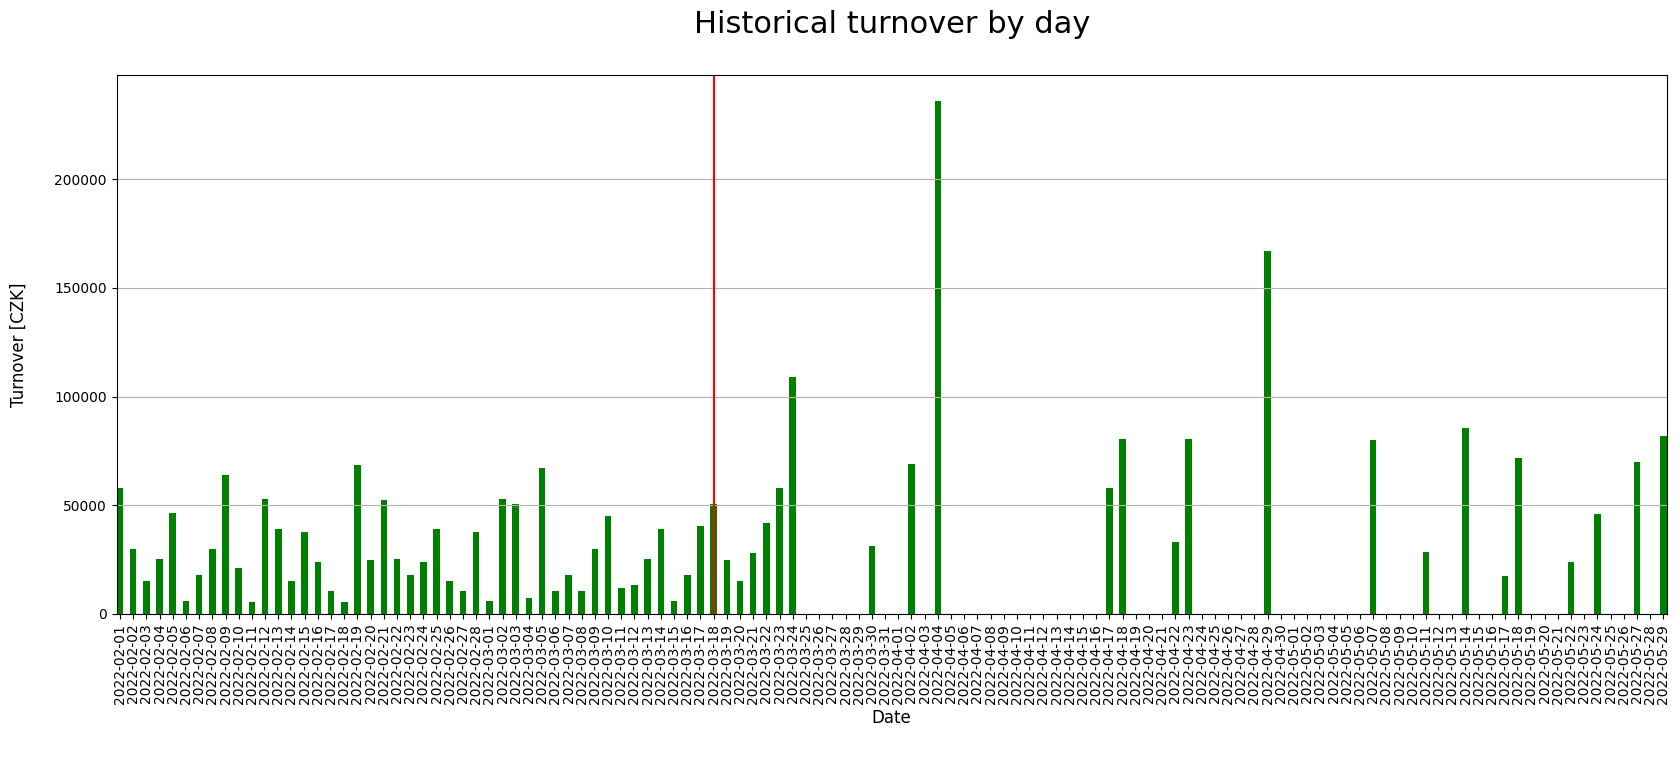

In [25]:
# Let's plot the graph of historical turnover given by day
from matplotlib import dates
fig, axes = plt.subplots(figsize=(20,7))
axes.bar(
    x=turnover_by_date.index,
    height=turnover_by_date["Turnover"],
    color="green", width=0.5)
axes.grid(axis="y")
axes.tick_params(axis='x', labelrotation=90)
axes.xaxis.set_major_locator(dates.DayLocator(interval=1))

plt.ylabel("Turnover [CZK]\n",
horizontalalignment="center",fontstyle="normal", 
fontsize="large", fontfamily="sans-serif")

plt.xlabel("Date\n", horizontalalignment="center",
fontstyle="normal", fontsize="large", 
fontfamily="sans-serif")

plt.title("Historical turnover by day\n",
horizontalalignment="center", fontstyle="normal", 
fontsize="22", fontfamily="sans-serif")

axes.autoscale(enable=True, axis='x', tight=True)

# Day 2022-03-18 the campaign had been started
plt.axvline(pd.Timestamp("2022-03-18"), color="red")

In [26]:
# Let's calculate number of orders by date
orders_by_date = extended_data[
    ["Date", "Transaction ID"]
].groupby(["Date"]).agg({
    "Transaction ID": "nunique"
}).sort_values(by="Date", ascending=True).rename(columns={
    "Transaction ID":"N.Orders"
})

In [27]:
# Let's have a look at the resulting data
orders_by_date.head()

,N.Orders
Date,
2022-02-01,1
2022-02-02,1
2022-02-03,1
2022-02-04,1
2022-02-05,1


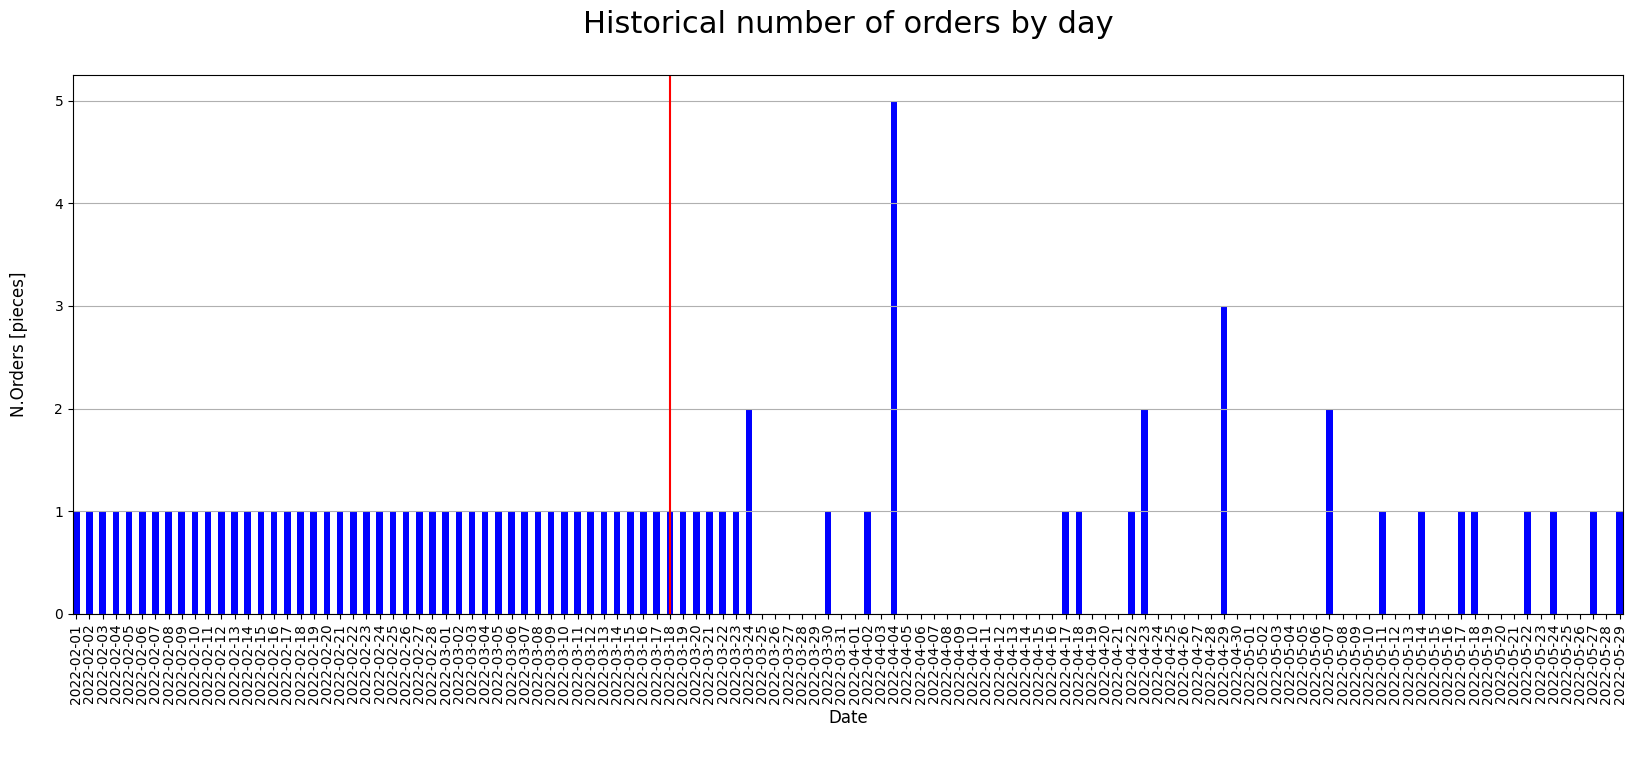

In [28]:
# Let's plot the graph of historical number of orders given by day
from matplotlib import dates
fig, axes = plt.subplots(figsize=(20,7))
axes.bar(
    x=orders_by_date.index,
    height=orders_by_date["N.Orders"],
    color="blue", width=0.5)
axes.grid(axis="y")
axes.tick_params(axis='x', labelrotation=90)
axes.xaxis.set_major_locator(dates.DayLocator(interval=1))

plt.ylabel("N.Orders [pieces]\n",
horizontalalignment="center",fontstyle="normal", 
fontsize="large", fontfamily="sans-serif")

plt.xlabel("Date\n", horizontalalignment="center",
fontstyle="normal", fontsize="large", 
fontfamily="sans-serif")

plt.title("Historical number of orders by day\n",
horizontalalignment="center", fontstyle="normal", 
fontsize="22", fontfamily="sans-serif")

axes.autoscale(enable=True, axis='x', tight=True)

# Day 2022-03-18 the campaign had been started
plt.axvline(pd.Timestamp("2022-03-18"), color="red")

## 4. Na seznamu produktů v E-shopu máme produkty nějak řazeny. Vždy stejně a nemění se to. Myslím, že to je řazeno podle toho, jak je přidáváme postupně do databáze. Pak si je samozřejmě může zákazník seřadit sám podle ceny. Myslíš, že hraje roli, jaké mají ty produkty na produktových listech pořadí, tedy jak jsou seřazeny defaultně? Je mi asi jasné, že ze současných dat to nevyčteš. Máš nějaký návrh, co bychom tedy potřebovali začít měřit, abychom se v tomto tématu posunuli dále?

In [29]:
# Let's calculate how many pieces were sold in each category
product_by_quantity = extended_data[
    ["Product name", "Quantity"]
].groupby(["Product name"]).agg({
    "Quantity": "sum"
}).sort_values(by="Quantity", ascending=False).rename(columns={
    "Quantity":"N.PiecesSold"
})

In [30]:
# Let's display the result
# we can order products on the web page, e.g. based on their popularity
product_by_quantity

,N.PiecesSold
Product name,
Bose QuietComfort Earbuds,24
JBL Charge 4,23
Sony WH-1000XM4,16
LG OLED55CX,14
Xiaomi Poco X3 Pro,14
Lenovo Tab P11 Pro,12
Samsung Galaxy Tab S7+,12
Apple iPad Air,10
Apple iPhone 12 Pro,10
